In [2]:
import config
import pandas as pd
import glob

### Load Data

In [7]:
data_files = glob.glob(config.data_dir+'*.csv')
print('number of files: ',len(data_files))

number of files:  15


In [9]:
dfs = []
for i,f in enumerate(data_files):
    df_i = pd.read_csv(f,sep=',',names=config.cols)
    df_i['participant_id'] = i
    dfs.append(df_i)
df  =pd.concat(dfs).reset_index(drop=True)
print(df.shape)
df.head(1)

(1926896, 6)


,sequential_number,x_acceleration,y_acceleration,z_acceleration,label,participant_id
0,0.0,2287,2948,2189,1,0


### Vizualize Data

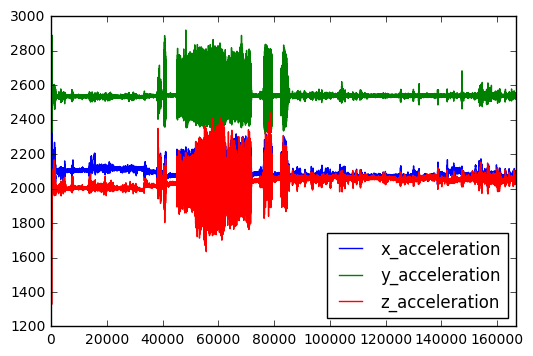

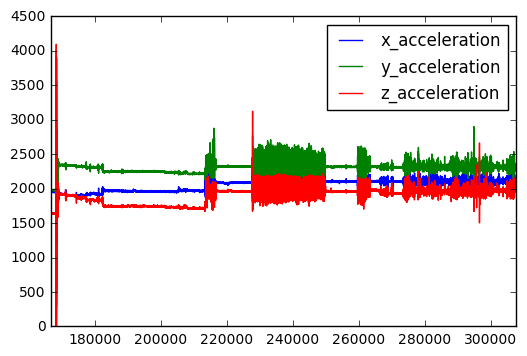

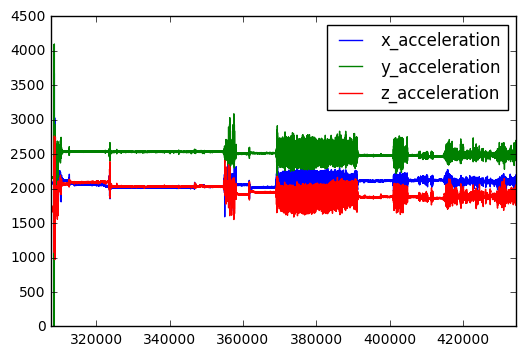

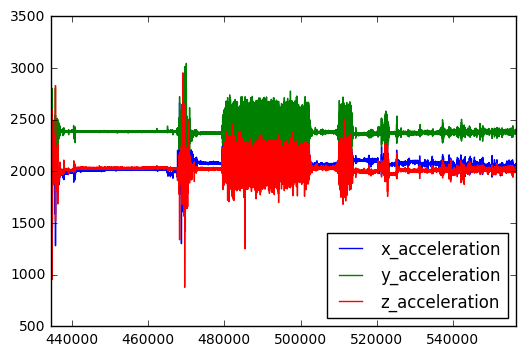

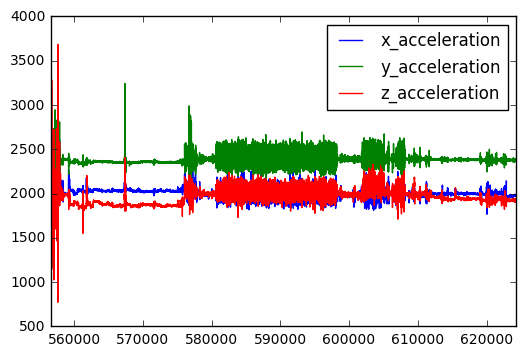

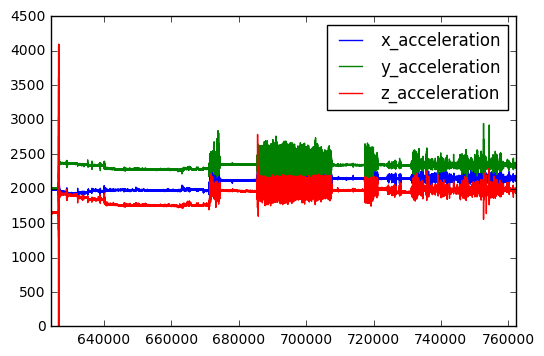

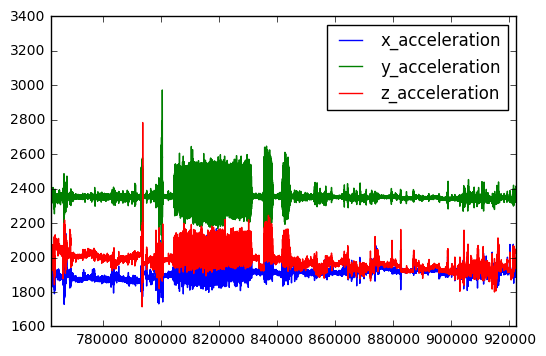

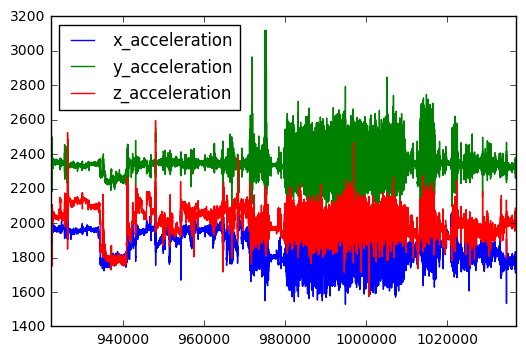

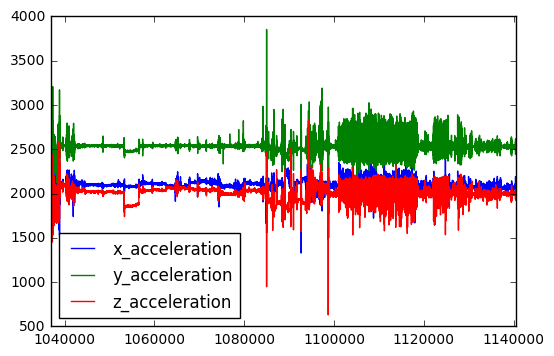

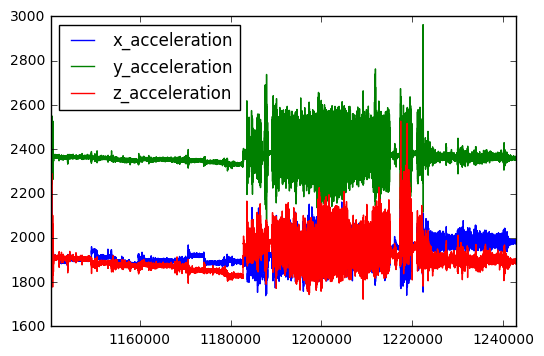

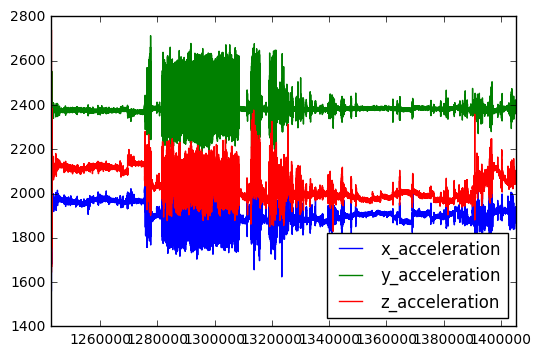

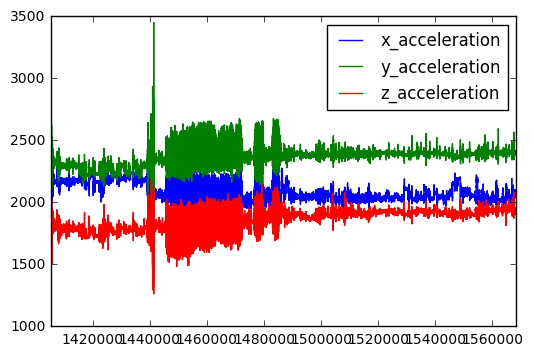

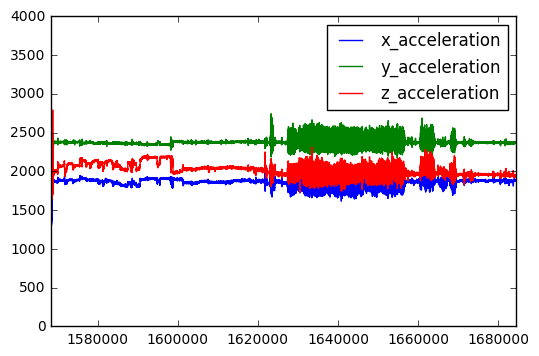

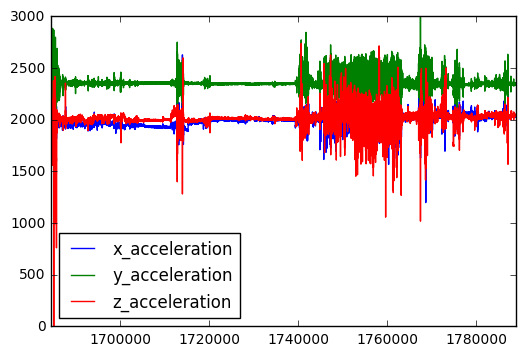

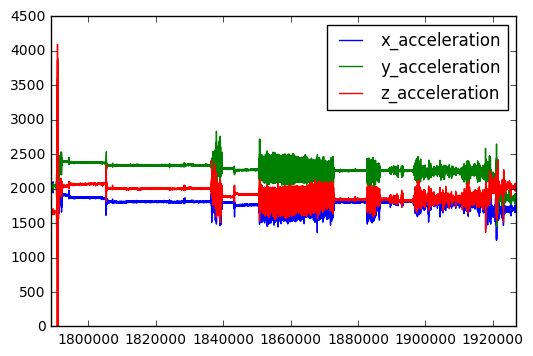

In [14]:
%matplotlib inline
for i in range(config.p_num):
    df[df['participant_id']==i][['x_acceleration','y_acceleration','z_acceleration']].plot()

Activity Highlighted for Participant 0


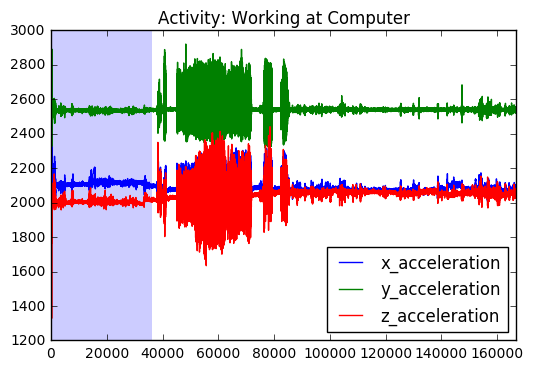

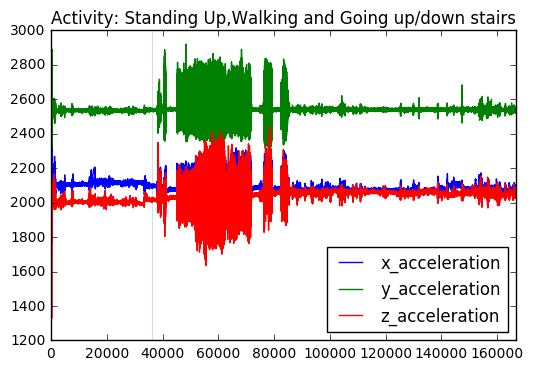

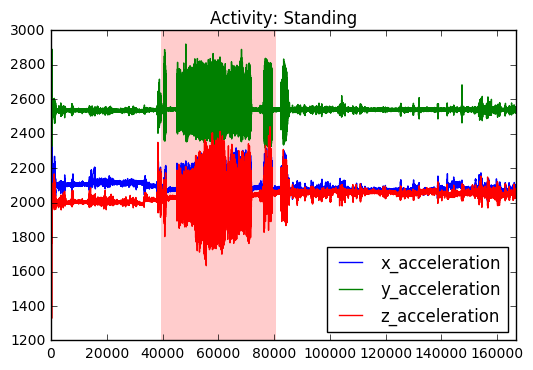

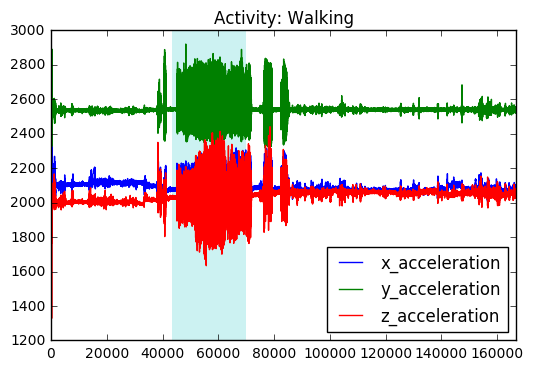

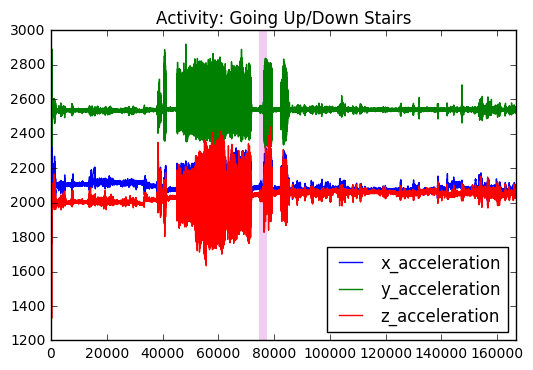

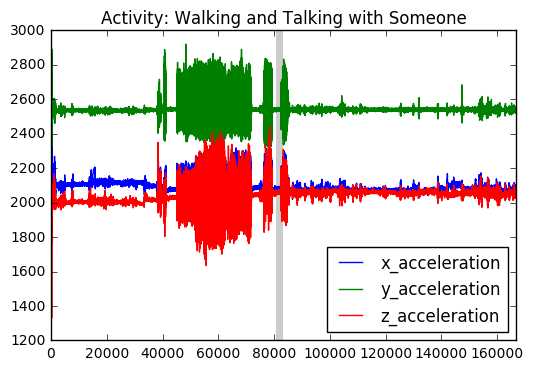

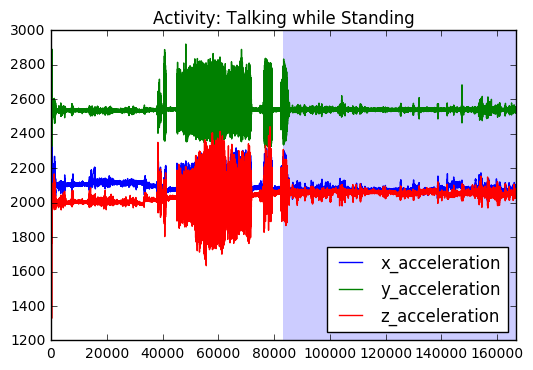

In [40]:
%matplotlib inline

from itertools import cycle
cycol = cycle('bgrcmk')

print("Activity Highlighted for Participant 0")

for a in range(1,config.act_num+1):
    
    plt = df[df['participant_id']==0][['x_acceleration','y_acceleration','z_acceleration']]\
            .plot(title="Activity: "+config.labels_dict[a])
        
    activity = df[(df['label']==a) & (df['participant_id']==0)].index
    
    plt.axvspan(min(activity),max(activity),facecolor=next(cycol), edgecolor='none', alpha=.2)